In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import calendar
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pylab 
from sklearn import metrics
import scipy.stats as stats
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./data_file/Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Splitting train-test
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100, stratify=data['Converted'])
print('% train- ', round(train_data.shape[0]/data.shape[0], 3))
print('% test- ', round(test_data.shape[0]/data.shape[0], 3))

% train-  0.7
% test-  0.3


In [5]:
train = train_data.copy()
test = test_data.copy()

### **Data Understanding and Data Cleaning**

#### **1. Check the data types and basic cleaning**

In [6]:
# Find the data types of each columns 
train_data_types = {}
for col in train.columns:
    train_data_types[col] = str(train[col].dtype)

In [7]:
set(train_data_types.values())

{'float64', 'int64', 'object'}

- The application dataset contains columns with type- float, int and object.
- Let's check that if there any numeric column which has become object type

In [8]:
# Let's check that if there any numeric column which has become object type
object_cols = [key for key in train_data_types if train_data_types[key] == 'object']
train[object_cols].head(10)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,Lead Add Form,Reference,No,No,Email Opened,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities,02.Medium,01.High,No,No,Email Opened
3109,c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b,Landing Page Submission,Direct Traffic,No,No,Form Submitted on Website,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Modified
3845,30e192d3-0d28-4a7c-9bc6-cca2e72084c4,API,Organic Search,No,No,SMS Sent,India,Media and Advertising,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,NaN,NaN,No,No,SMS Sent
1020,4765201f-2aca-4082-a7f1-0f5f59478987,API,Referral Sites,No,No,Olark Chat Conversation,India,"Banking, Investment And Insurance",Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,01.High,02.Medium,No,No,Modified
2903,d6edd084-5075-4177-b200-16496ba1f1bb,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Operations Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Mumbai,02.Medium,01.High,No,Yes,Modified
4138,8c39bbbe-6022-4fd1-a848-4285a3a2a586,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Finance Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,NaN,NaN,No,No,Modified
4396,787d57cb-2c32-4ace-b671-183b16348529,API,Olark Chat,Yes,No,Olark Chat Conversation,NaN,Select,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Already a student,Worst,No,No,Student of SomeSchool,Select,NaN,NaN,No,No,Modified
5834,b944b845-8983-43f6-a56b-a7f7c2a8f933,API,Google,No,No,Converted to Lead,India,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN,No,No,Modified
6197,090e8088-0b4a-42db-92ca-56212878264c,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,"Banking, Investment And Insurance",Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,NaN,NaN,No,Yes,Email Opened
7001,99ec2f8c-e06e-4d1b-accb-1b1f758f557f,API,Olark Chat,No,No,Email Opened,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,No,No,Email Opened


* there is no any numeric column which has become object type
* But few of the categorical columns contain "select"

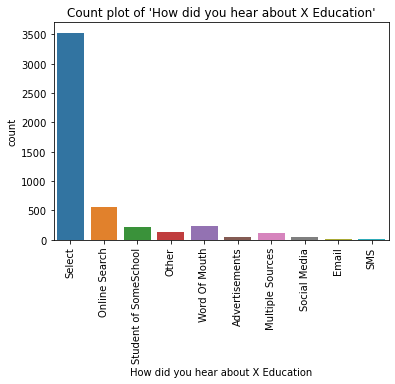

In [9]:
plt.title("Count plot of 'How did you hear about X Education'")
ax = sns.countplot(train['How did you hear about X Education'])
plt.xticks(rotation=90)
plt.show()

* There are a lot of rows which have 'Select' in their value. 
* Maybe some of these categorical fields hold drop-down menu's values. Because, in general 'select' is the default option in any drop-down.
* We would have to replace 'Select' with a Null.

In [10]:
# Let's see which all columns contain 'Select'
cols_with_select = [col for col in object_cols if train[col].str.lower().str.contains('select').any()]
train[cols_with_select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
7356,Marketing Management,Select,Potential Lead,Other Cities
3109,Human Resource Management,Online Search,Potential Lead,Mumbai
3845,Media and Advertising,Select,Potential Lead,Select
1020,"Banking, Investment And Insurance",Online Search,Select,Mumbai
2903,Operations Management,Select,Select,Mumbai


In [11]:
cols_with_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [12]:
# Replace 'Select' with None 
for col in cols_with_select:
    train[col] = np.where(train[col].str.lower().str.contains('select'), None, train[col])

In [13]:
# Let's verify now if any object columns have 'Select'
cols_with_select = [col for col in object_cols if train[col].str.lower().str.contains('select').any()]
cols_with_select

[]

In [14]:
train[object_cols].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,Lead Add Form,Reference,No,No,Email Opened,NaN,Marketing Management,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities,02.Medium,01.High,No,No,Email Opened
3109,c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b,Landing Page Submission,Direct Traffic,No,No,Form Submitted on Website,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Modified
3845,30e192d3-0d28-4a7c-9bc6-cca2e72084c4,API,Organic Search,No,No,SMS Sent,India,Media and Advertising,None,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,None,NaN,NaN,No,No,SMS Sent
1020,4765201f-2aca-4082-a7f1-0f5f59478987,API,Referral Sites,No,No,Olark Chat Conversation,India,"Banking, Investment And Insurance",Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,None,Mumbai,01.High,02.Medium,No,No,Modified
2903,d6edd084-5075-4177-b200-16496ba1f1bb,Landing Page Submission,Direct Traffic,No,No,Converted to Lead,India,Operations Management,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,None,Mumbai,02.Medium,01.High,No,Yes,Modified


In [15]:
# Let's check the numeric columns status
train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6468.000000,6468.000000,6364.00000,6468.000000,6364.000000,3532.000000,3532.000000
mean,617423.360235,0.385436,3.39472,481.188002,2.334926,14.317384,16.333805
std,23439.631077,0.486736,4.20350,547.374668,2.172071,1.384587,1.816368
min,579533.000000,0.000000,0.00000,0.000000,0.000000,7.000000,11.000000
25%,596698.500000,0.000000,1.00000,8.000000,1.000000,14.000000,15.000000
50%,615798.000000,0.000000,3.00000,241.000000,2.000000,14.000000,16.000000
75%,637856.500000,1.000000,5.00000,921.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,141.00000,2272.000000,55.000000,18.000000,20.000000


#### **2. Missing values**

In [16]:
# Find the % nulls in all the columns
def get_nulls_count(data_df):
    """
    Funtion to find the null counts and %nulls for all the columns of a given dataframe
    
    @param data_df: DataFrame
    """
    nulls_count = data_df.isnull().sum().reset_index().rename(columns={'index': 'columns', 0: 'null_count'})
    nulls_count['%_nulls_count'] = nulls_count['null_count']/data_df.shape[0] * 100
    dtype_df = data_df.dtypes.reset_index()
    dtype_df.columns = ['columns', 'dtype']
    nulls_count = nulls_count.merge(dtype_df, on='columns', how='left')
    return nulls_count

nulls_count = get_nulls_count(train.copy())

In [17]:
nulls_tmp = nulls_count[nulls_count['%_nulls_count']!=0]
print("Number of columns having nulls in them: ", nulls_tmp.shape[0])
nulls_tmp

Number of columns having nulls in them:  17


,columns,null_count,%_nulls_count,dtype
3,Lead Source,26,0.401979,object
7,TotalVisits,104,1.607916,float64
9,Page Views Per Visit,104,1.607916,float64
10,Last Activity,81,1.252319,object
11,Country,1766,27.303649,object
12,Specialization,2372,36.672851,object
13,How did you hear about X Education,5086,78.633271,object
14,What is your current occupation,1900,29.375387,object
15,What matters most to you in choosing a course,1912,29.560915,object
24,Tags,2374,36.703772,object


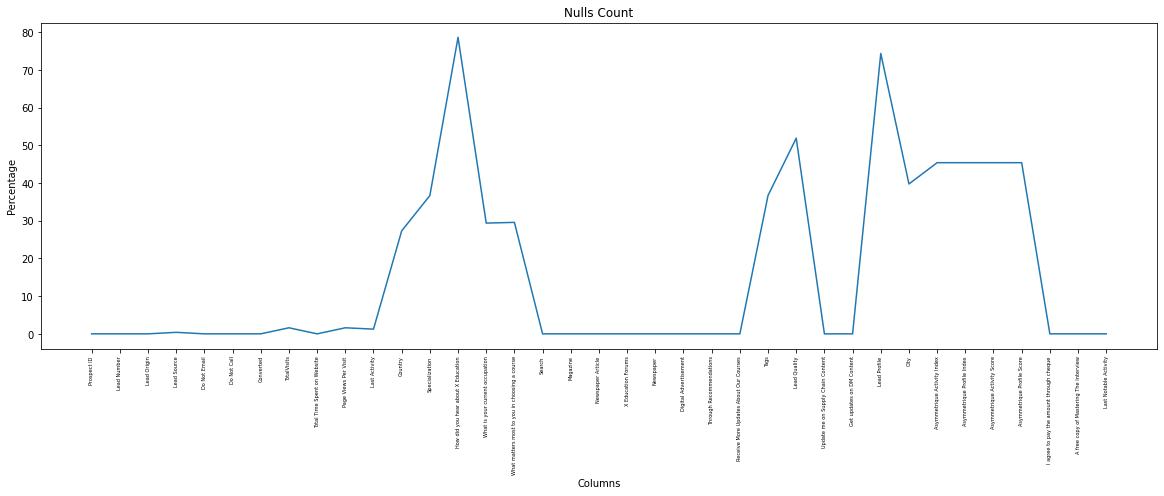

In [18]:
# Let's draw a line chart on %_nulls_count
plt.figure(figsize=[20,6])
plt.plot(nulls_count['columns'], nulls_count['%_nulls_count'])
plt.title('Nulls Count')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.xticks(rotation=90, fontsize=5)
plt.show()

* Total 17 columns which have nulls.
* There are a few columns with %null < 5
* Few columns also have null with more than 25%

* As we can see there are many fields where %null > 25. Let's see all of them.

In [19]:
# Let's check how many attributes having nulls more than 25%
_tmp_more_25 = nulls_tmp[nulls_tmp['%_nulls_count'] > 25]
print("Number of columns having more than 25% null values: ", _tmp_more_25.shape[0])
_tmp_more_25

Number of columns having more than 25% null values:  13


,columns,null_count,%_nulls_count,dtype
11,Country,1766,27.303649,object
12,Specialization,2372,36.672851,object
13,How did you hear about X Education,5086,78.633271,object
14,What is your current occupation,1900,29.375387,object
15,What matters most to you in choosing a course,1912,29.560915,object
24,Tags,2374,36.703772,object
25,Lead Quality,3356,51.886209,object
28,Lead Profile,4809,74.350649,object
29,City,2571,39.749536,object
30,Asymmetrique Activity Index,2936,45.392703,object


In [20]:
# Let's check how many attributes having nulls less than 25%
_tmp_less_25 = nulls_tmp[nulls_tmp['%_nulls_count'] <= 25]
print("Number of columns having less than and equal to 25% null values: ", _tmp_less_25.shape[0])
_tmp_less_25

Number of columns having less than and equal to 25% null values:  4


,columns,null_count,%_nulls_count,dtype
3,Lead Source,26,0.401979,object
7,TotalVisits,104,1.607916,float64
9,Page Views Per Visit,104,1.607916,float64
10,Last Activity,81,1.252319,object


* We can remove all of those columns that have more than 40% nulls.
* We can handle the missing values in all of those columns that have <=25% nulls. In case of numeric columns, we would fill their missing values with their 50th percentile value. And, in case of categorical columns, we would fill their missing values by taking the mode of that column.
* For columns having %nulls > 25% and < 40%, as all of them are object/categorical fields, we can think Null as a value/information and will Null with a string 'NA'

In [21]:
def drop_columns_with_missing_value(data_df, threshold):
    """
    Function to drop all the columns having %missing values >= threshold value.
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    
    @return: dataframe
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] >= threshold)]
    data_df.drop(tmp_df['columns'].to_list(), axis=1, inplace=True)
    return data_df

In [22]:
def fill_numeric_missing_values(data_df, threshold):
    """
    Function to handle the missing values in the numeric columns by filling with the median value of that column.
    It handles missing value for those columns only where the %nulls is less than the provided threshold
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] <= threshold)]
    
    data_describe = data_df[tmp_df['columns']].describe()
    print("Started filling the missing values in the numeric columns.")
    print()
    for col in data_describe.columns:
        print(f"Type of {col}: {data_df[col].dtype}")
        if 'object' in str(data_df[col].dtype):
#             print("Expecting numeric type column, got some other type.")
            continue
        data_df[col] = data_df[col].fillna(data_describe[col]['50%'])
    return data_df


def fill_object_missing_values(data_df, threshold):
    """
    Function to handle the missing values in the categorical/object columns by filling with the mode value of that column.
    It handles missing value for those columns only where the %nulls is less than the provided threshold
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] <= threshold)]
    
    print("Started filling the missing values in the text columns.")
    print()
    
    for _, row in tmp_df.iterrows():
        print(f"Type of {row['columns']}: {data_df[row['columns']].dtype}")
        if 'object' not in str(data_df[row['columns']].dtype):
            continue
        if row['%_nulls_count'] <= 25:
            data_df[row['columns']] = data_df[row['columns']].fillna(data_df[row['columns']].mode()[0])
        else:
            data_df[row['columns']] = data_df[row['columns']].fillna('NA')
    return data_df

In [23]:
train_new = drop_columns_with_missing_value(train.copy(), 40)
train_new = fill_numeric_missing_values(train_new.copy(), 25)
train_new = fill_object_missing_values(train_new.copy(), 40)

Started filling the missing values in the numeric columns.

Type of TotalVisits: float64
Type of Page Views Per Visit: float64
Started filling the missing values in the text columns.

Type of Lead Source: object
Type of Last Activity: object
Type of Country: object
Type of Specialization: object
Type of What is your current occupation: object
Type of What matters most to you in choosing a course: object
Type of Tags: object
Type of City: object


In [24]:
# Let's check if any null still present?
get_nulls_count(train_new.copy())

,columns,null_count,%_nulls_count,dtype
0,Prospect ID,0,0.0,object
1,Lead Number,0,0.0,int64
2,Lead Origin,0,0.0,object
3,Lead Source,0,0.0,object
4,Do Not Email,0,0.0,object
5,Do Not Call,0,0.0,object
6,Converted,0,0.0,int64
7,TotalVisits,0,0.0,float64
8,Total Time Spent on Website,0,0.0,int64
9,Page Views Per Visit,0,0.0,float64


#### **3. Checking Outliers**

In [25]:
train_new.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617423.360235,0.385436,3.388374,481.188002,2.329541
std,23439.631077,0.486736,4.169859,547.374668,2.154947
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596698.500000,0.000000,1.000000,8.000000,1.000000
50%,615798.000000,0.000000,3.000000,241.000000,2.000000
75%,637856.500000,1.000000,5.000000,921.000000,3.000000
max,660737.000000,1.000000,141.000000,2272.000000,55.000000


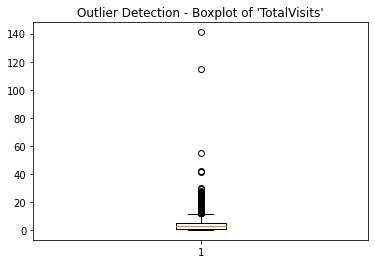

In [26]:
plt.title("Outlier Detection - Boxplot of 'TotalVisits'")
plt.boxplot(train_new['TotalVisits'])
plt.show()

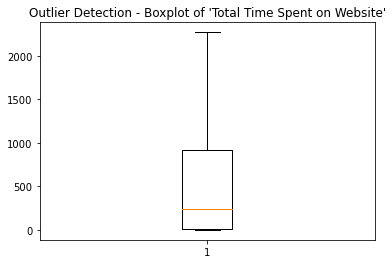

In [27]:
plt.title("Outlier Detection - Boxplot of 'Total Time Spent on Website'")
plt.boxplot(train_new['Total Time Spent on Website'])
plt.show()

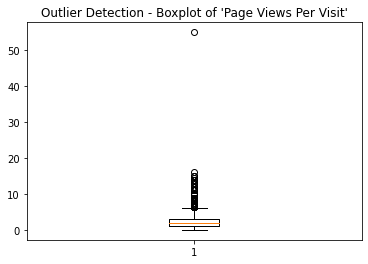

In [28]:
plt.title("Outlier Detection - Boxplot of 'Page Views Per Visit'")
plt.boxplot(train_new['Page Views Per Visit'])
plt.show()

* 'Total Time Spent on Website' looks completely fine.
* 'TotalVisits and 'Page Views Per Visit' have 1-2 records that are a bit off but not too much. So, we we can ignore.

In [29]:
train_new.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,1413bf41-c7b5-494f-ab82-f9e35cf609e1,593016,Lead Add Form,Reference,No,No,1,0.0,0,0.0,Email Opened,NA,Marketing Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Other Cities,No,No,Email Opened


#### **4. Analysing the data**

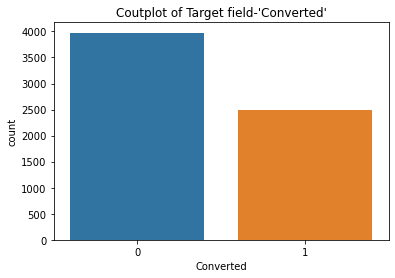

In [30]:
# check the distribution of TARGET variable
plt.title("Coutplot of Target field-'Converted'")
sns.countplot(train_new['Converted'])
plt.show()

In [31]:
train_new['Converted'].value_counts(normalize=True)

0    0.614564
1    0.385436
Name: Converted, dtype: float64

In [32]:
# Find the data types of each columns 
train_data_types = {}
for col in train_new.columns:
    train_data_types[col] = str(train_new[col].dtype)
    
all_object_cols = [key for key in train_data_types if train_data_types[key] == 'object' and key != 'Prospect ID']

In [33]:
train_new[all_object_cols].head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7356,Lead Add Form,Reference,No,No,Email Opened,NA,Marketing Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Other Cities,No,No,Email Opened
3109,Landing Page Submission,Direct Traffic,No,No,Form Submitted on Website,India,Human Resource Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,Yes,Modified
3845,API,Organic Search,No,No,SMS Sent,India,Media and Advertising,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,NA,No,No,SMS Sent


In [34]:
# Let's analyze 'yes'-'no' fields
object_cols = ['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [35]:
for col in object_cols:
    print(f"Total number of unique value in '{col}': {len(train_new[col].unique())}")

Total number of unique value in 'Do Not Email': 2
Total number of unique value in 'Do Not Call': 2
Total number of unique value in 'Search': 2
Total number of unique value in 'Magazine': 1
Total number of unique value in 'Newspaper Article': 2
Total number of unique value in 'X Education Forums': 2
Total number of unique value in 'Newspaper': 2
Total number of unique value in 'Digital Advertisement': 2
Total number of unique value in 'Through Recommendations': 2
Total number of unique value in 'Receive More Updates About Our Courses': 1
Total number of unique value in 'Update me on Supply Chain Content': 1
Total number of unique value in 'Get updates on DM Content': 1
Total number of unique value in 'I agree to pay the amount through cheque': 1
Total number of unique value in 'A free copy of Mastering The Interview': 2


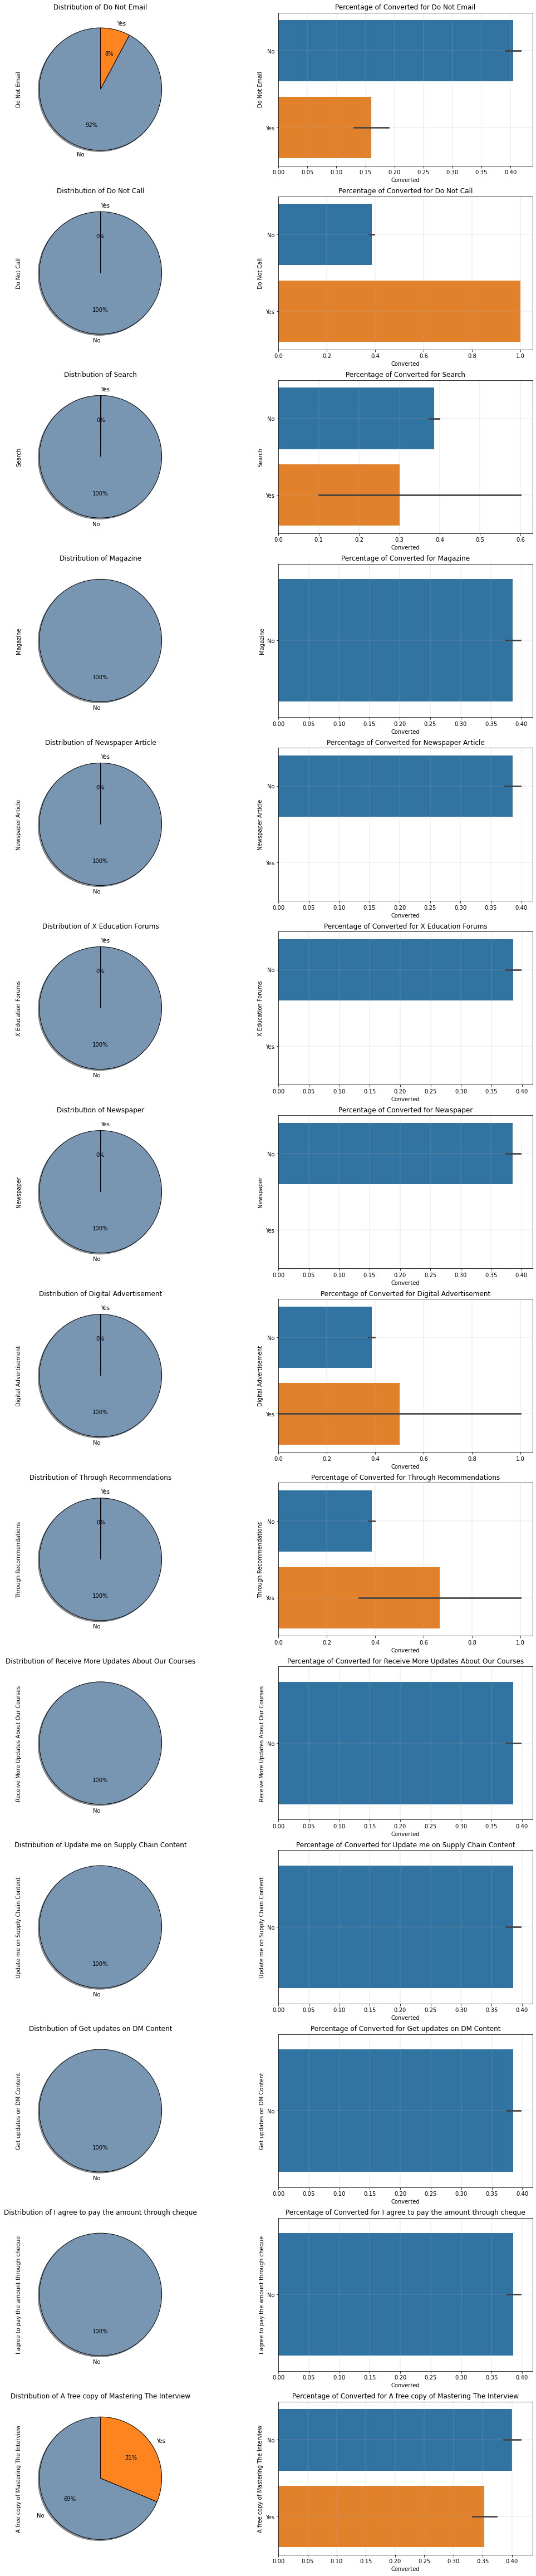

In [36]:

index = 1
plt.figure(figsize=(18, 6 * len(object_cols)))
for col in object_cols:
    plt.subplot(len(object_cols), 2, index)
    train[col].value_counts().plot.pie(autopct="%1.0f%%",
                                         colors=["#7895B2", "#FD841F"],
                                         startangle=90,
                                         wedgeprops={"linewidth":1, "edgecolor":"k"},
                                         shadow=True)
    plt.title(f"Distribution of {col}")
    
    index += 1
    plt.subplot(len(object_cols), 2, index)
    ax = sns.barplot(data=train, y=col, x='Converted', orient='h')
    ax.grid(linestyle='-', linewidth=0.3)
    plt.title(f"Percentage of Converted for {col}")
    index += 1
    
plt.show()

* From the above **pie chart** we can observe that most of the yes-no fields are highly imbalanced and contain only 'No'. 
* We can keep only **'Do Not Email'** and **'A free copy of Mastering The Interview'**, rest we can drop as they don't serve much value.
* **We can see that the customer who is interested in 'Mastering the interview', they are likely to be converted.**

In [37]:
# Dropping these unwanted flag columns
object_cols_to_drop = [
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

train_new.drop(object_cols_to_drop, axis=1, inplace=True)

In [38]:
# Analyzing rest object columns.
rest_object_cols = ['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [39]:
def create_two_side_by_side_barplot(data_df, col, target_col):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"{col} vs. {target_col}")
    plt.xticks(rotation=90)
    sns.barplot(data_df[col], data_df[target_col])

    plt.subplot(1, 2, 2)
    plt.title(f"Count-plot of {col}")
    plt.xticks(rotation=90)
    sns.countplot(data_df[col])
#     sns.barplot(data_df[col2], data_df[target_col])

    plt.show()

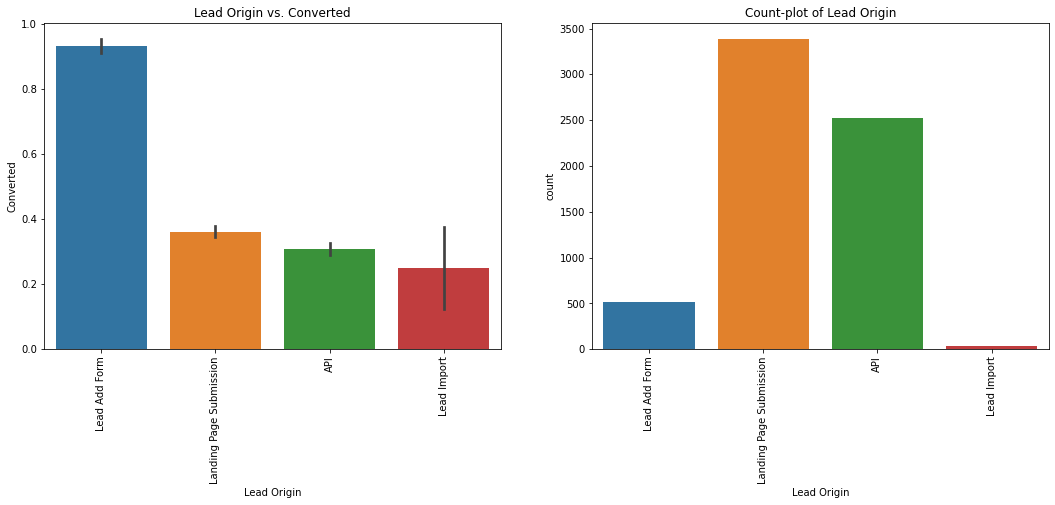

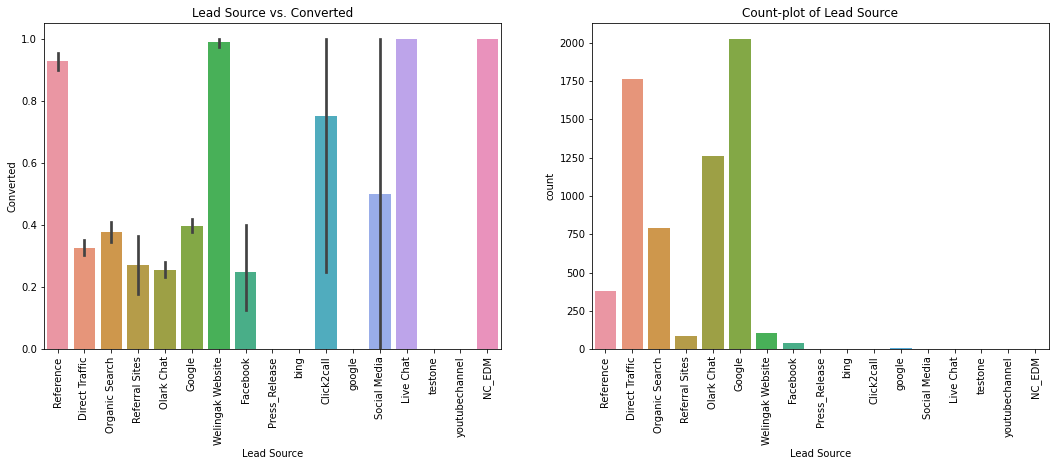

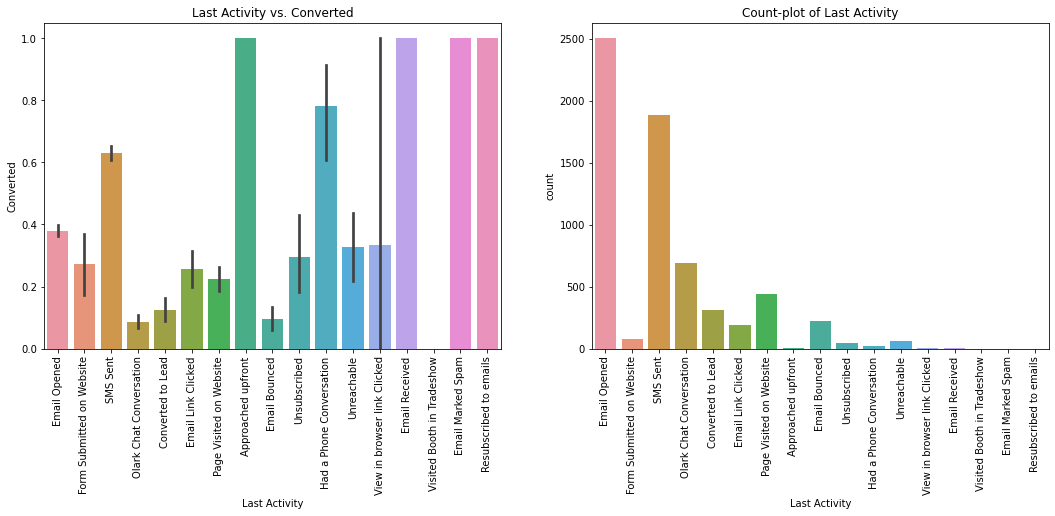

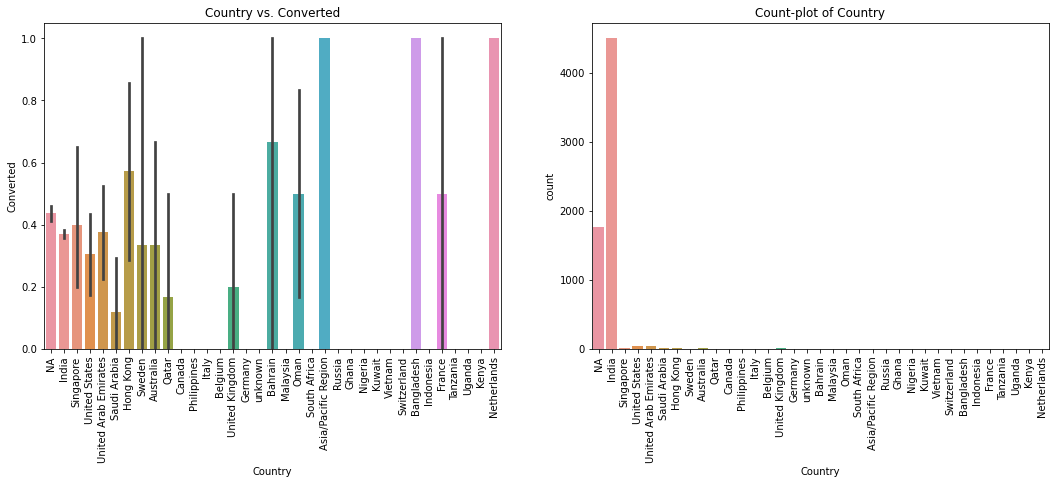

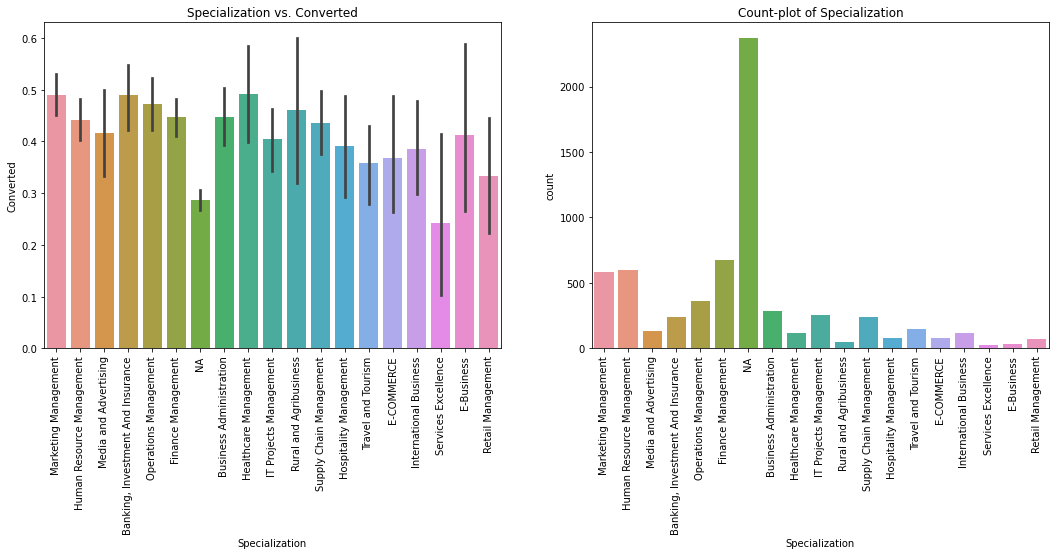

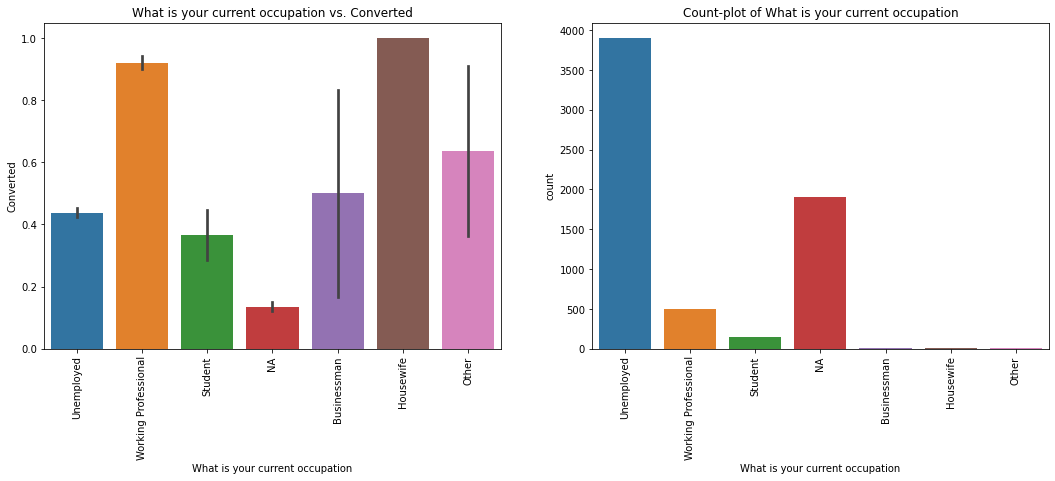

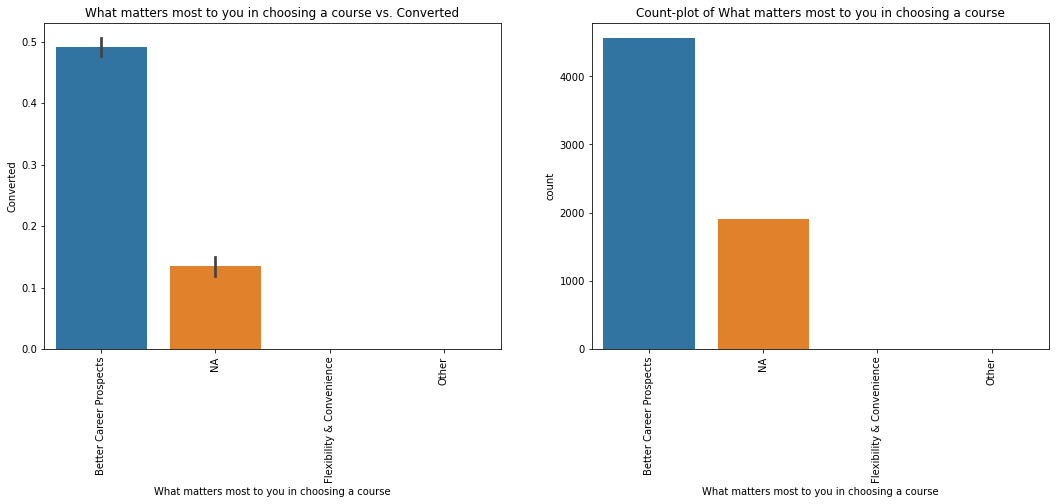

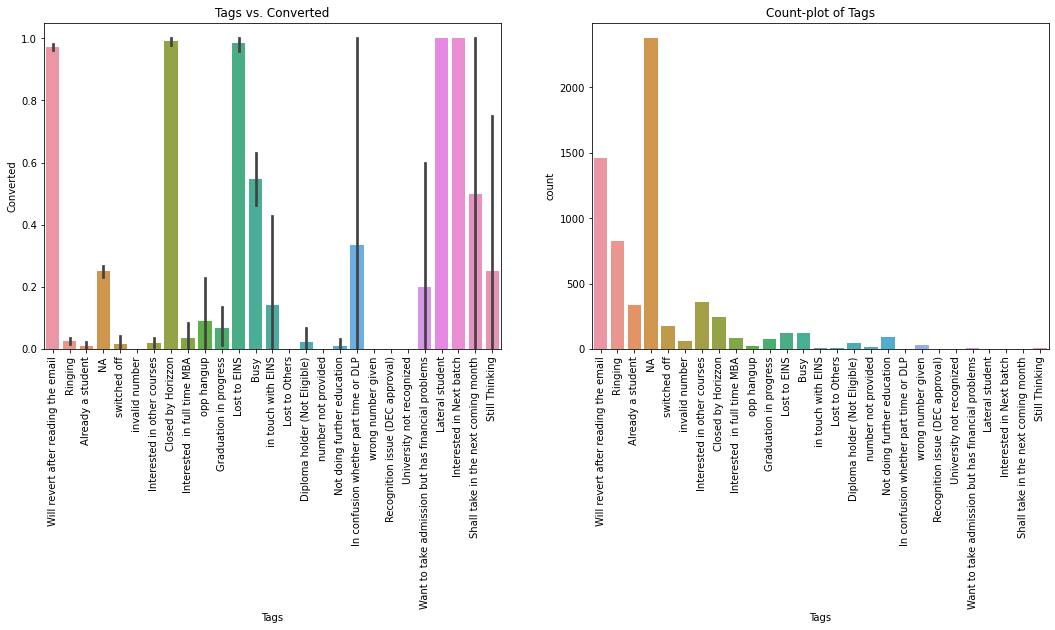

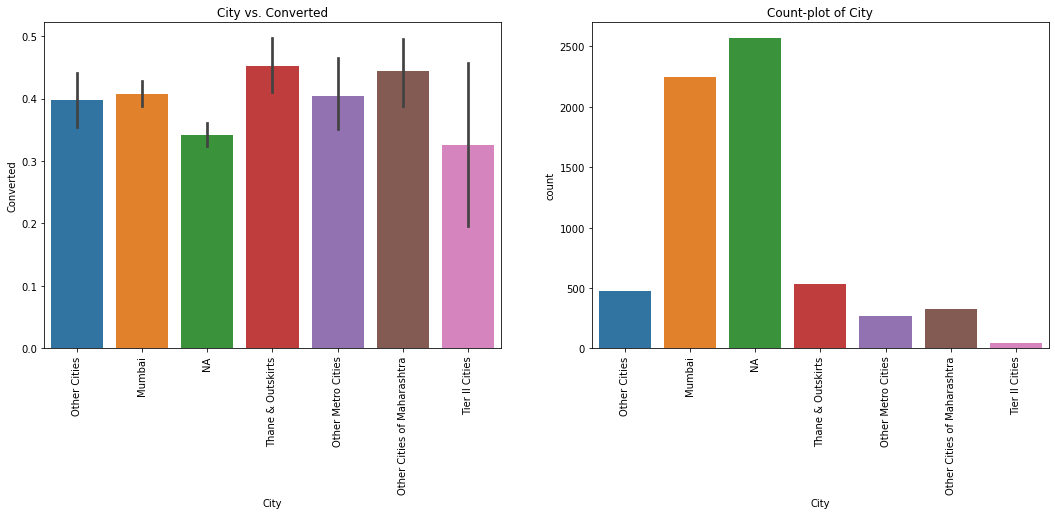

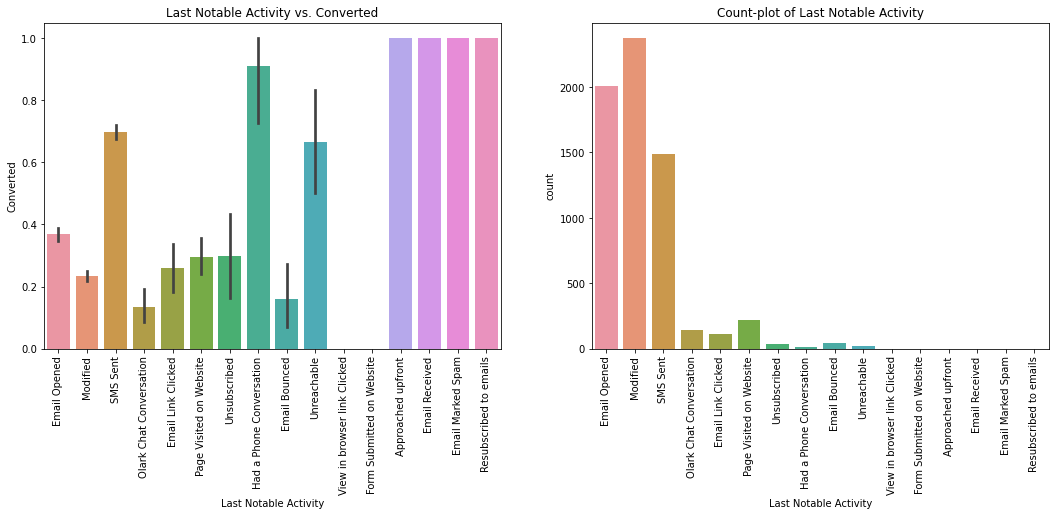

In [40]:
for col in rest_object_cols:
    create_two_side_by_side_barplot(train_new.copy(), col, 'Converted')

* Country has 'unknown' which looks similar to Null
* 'Last Notable Activity' and 'Last Activity' values look similar. Let's check that

In [41]:
_tmp_corr_df = train_new[['Last Notable Activity', 'Last Activity']]
_tmp_corr_df[_tmp_corr_df['Last Notable Activity'] != _tmp_corr_df['Last Activity']]

,Last Notable Activity,Last Activity
3109,Modified,Form Submitted on Website
1020,Modified,Olark Chat Conversation
2903,Modified,Converted to Lead
4138,Modified,Converted to Lead
4396,Modified,Olark Chat Conversation
...,...,...
5715,Modified,SMS Sent
17,Modified,Email Link Clicked
5248,Modified,SMS Sent
8554,Modified,Email Opened


In [42]:
_tmp_corr_df[_tmp_corr_df['Last Notable Activity'] == _tmp_corr_df['Last Activity']]

,Last Notable Activity,Last Activity
7356,Email Opened,Email Opened
3845,SMS Sent,SMS Sent
6197,Email Opened,Email Opened
7001,Email Opened,Email Opened
5399,Olark Chat Conversation,Olark Chat Conversation
...,...,...
5819,SMS Sent,SMS Sent
3438,Email Opened,Email Opened
5984,Email Opened,Email Opened
2634,Email Opened,Email Opened


In [43]:
# Let's check what all different value 'Last Notable Activity' holds when 'Last Notable Activity' != 'Last Activity'
_tmp_corr_df[_tmp_corr_df['Last Notable Activity'] != _tmp_corr_df['Last Activity']]['Last Notable Activity'].unique()

array(['Modified'], dtype=object)

* 4093 records where 'Last Notable Activity' == 'Last Activity'.
* In case of 'Last Notable Activity' != 'Last Activity', 'Last Notable Activity' only holds a value 'Modified' (Which looks like a default value).
* So there are no major difference between 'Last Activity' and 'Last Notable Activity'. This would increase a change of singularity while creating dummy variables.
* **So, we can drop 'Last Notable Activity' and keep 'Last Activity'.**

In [44]:
train_new.drop('Last Notable Activity', axis=1, inplace=True)

In [45]:
# Let's see how many numeric variables we are left with
train_new.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617423.360235,0.385436,3.388374,481.188002,2.329541
std,23439.631077,0.486736,4.169859,547.374668,2.154947
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596698.500000,0.000000,1.000000,8.000000,1.000000
50%,615798.000000,0.000000,3.000000,241.000000,2.000000
75%,637856.500000,1.000000,5.000000,921.000000,3.000000
max,660737.000000,1.000000,141.000000,2272.000000,55.000000


In [46]:

numeric_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
train_new[numeric_columns].corr().style.background_gradient(cmap='RdYlGn')

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.262357,0.599505
Total Time Spent on Website,0.262357,1.000000,0.315044
Page Views Per Visit,0.599505,0.315044,1.000000


* 'Page Views Per Visit' and 'TotalVisits' look a bit correlated. Let's see by ploting regression plot

<Figure size 864x432 with 0 Axes>

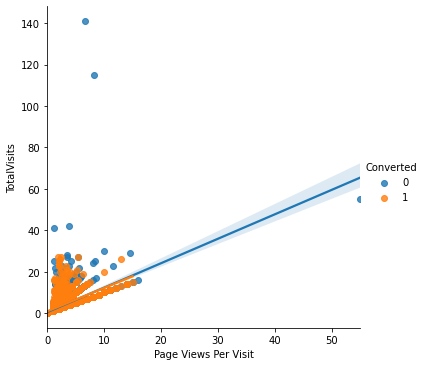

In [47]:

plt.figure(figsize=(12, 6))
sns.lmplot(data=train_new, x='Page Views Per Visit', y='TotalVisits', hue='Converted')
plt.show()

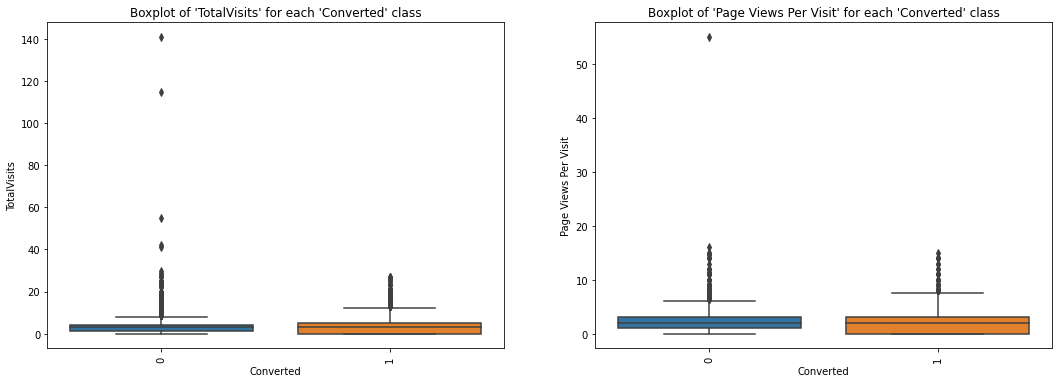

In [48]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title("Boxplot of 'TotalVisits' for each 'Converted' class")
sns.boxplot(x="Converted", y="TotalVisits", data=train_new)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title("Boxplot of 'Page Views Per Visit' for each 'Converted' class")
sns.boxplot(x="Converted", y="Page Views Per Visit", data=train_new)
plt.xticks(rotation=90)

plt.show()

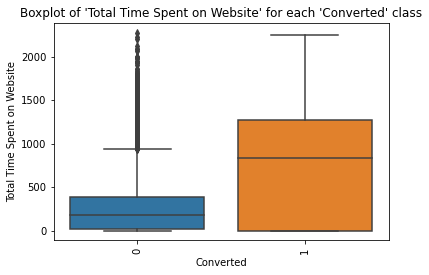

In [49]:
plt.title("Boxplot of 'Total Time Spent on Website' for each 'Converted' class")
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=train_new)
plt.xticks(rotation=90)

plt.show()

* We can see clearly that people who are spending more time on the website are likely to be Converted.

In [50]:
# Final list of columns
train_new.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'A free copy of Mastering The Interview']

In [51]:
final_columns_list = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits',
 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags',
 'City', 'A free copy of Mastering The Interview']

In [52]:
len(final_columns_list)

17

### Let's wrap all transformation into functions

* We can write these transformation codes into seperate python file or ipynb notebook.
* Since we have a lot of categories in many variables, creating dummy variables is increasing the chance of getting 'Singular matrix' error.
* **We also tried creating dummy variables from these categorical fields, but ended up getting 'LinAlgError: Singular matrix' error. So, we have changed the way to encode these categorical fields. We have used LabelEncoder() from sklearn to encode these categorical variables.**

In [53]:
data = pd.read_csv('./data_file/Leads.csv')

# Splitting train-test
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100, stratify=data['Converted'])
print('% train- ', round(train_data.shape[0]/data.shape[0], 3))
print('% test- ', round(test_data.shape[0]/data.shape[0], 3))

% train-  0.7
% test-  0.3


In [54]:
# Find the % nulls in all the columns
def get_nulls_count(data_df):
    """
    Funtion to find the null counts and %nulls for all the columns of a given dataframe
    
    @param data_df: DataFrame
    """
    nulls_count = data_df.isnull().sum().reset_index().rename(columns={'index': 'columns', 0: 'null_count'})
    nulls_count['%_nulls_count'] = nulls_count['null_count']/data_df.shape[0] * 100
    dtype_df = data_df.dtypes.reset_index()
    dtype_df.columns = ['columns', 'dtype']
    nulls_count = nulls_count.merge(dtype_df, on='columns', how='left')
    return nulls_count

def drop_columns_with_missing_value(data_df, threshold):
    """
    Function to drop all the columns having %missing values >= threshold value.
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    
    @return: dataframe
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] >= threshold)]
    data_df.drop(tmp_df['columns'].to_list(), axis=1, inplace=True)
    return data_df

def fill_numeric_missing_values(data_df, threshold):
    """
    Function to handle the missing values in the numeric columns by filling with the median value of that column.
    It handles missing value for those columns only where the %nulls is less than the provided threshold
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] <= threshold)]
    
    data_describe = data_df[tmp_df['columns']].describe()
    for col in data_describe.columns:
        if 'object' in str(data_df[col].dtype):
            continue
        data_df[col] = data_df[col].fillna(data_describe[col]['50%'])
    return data_df


def fill_object_missing_values(data_df, threshold):
    """
    Function to handle the missing values in the categorical/object columns by filling with the mode value of that column.
    It handles missing value for those columns only where the %nulls is less than the provided threshold
    
    @param data_df: DataFrame
    @param threshold: %nulls threshold
    """
    nulls_count = get_nulls_count(data_df)
    tmp_df = nulls_count[(nulls_count['%_nulls_count'] != 0) & (nulls_count['%_nulls_count'] <= threshold)]
    
    for _, row in tmp_df.iterrows():
        if 'object' not in str(data_df[row['columns']].dtype):
            continue
        if row['%_nulls_count'] <= 25:
            data_df[row['columns']] = data_df[row['columns']].fillna(data_df[row['columns']].mode()[0])
        else:
            # Filling Null with NA + column name
            data_df[row['columns']] = data_df[row['columns']].fillna(f"NA_{row['columns']}")
    return data_df

def transform_data(data_df, remove_addition_columns=None):
    # Replace 'Select' and 'unknown' with None 
    cols_with_select = ['Specialization',
     'How did you hear about X Education',
     'Lead Profile',
     'City']    
    for col in cols_with_select:
        data_df[col] = np.where(data_df[col].str.lower().str.contains('select'), None, data_df[col])
          
        
    # Handling missing values
    data_df = drop_columns_with_missing_value(data_df.copy(), 40)
    data_df = fill_numeric_missing_values(data_df.copy(), 25)
    data_df = fill_object_missing_values(data_df.copy(), 40)
    
    # Keeping the required columns
    final_columns_list = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits',
                         'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
                         'What is your current occupation', 'What matters most to you in choosing a course', 'Tags',
                         'City', 'A free copy of Mastering The Interview']
    data_df = data_df[final_columns_list]
    
    # yes-no mapping
    yes_no_mapping = {'Yes': 1, 'No': 0}
    data_df['A free copy of Mastering The Interview'] = data_df['A free copy of Mastering The Interview'].map(yes_no_mapping)
    data_df['Do Not Email'] = data_df['Do Not Email'].map(yes_no_mapping)
    
    if remove_addition_columns:
        data_df.drop(remove_addition_columns, axis=1, inplace=True)
    
    y_data = data_df.pop('Converted')
    return data_df, y_data


def transform_train_data(data_frame, remove_addition_columns=None):
    """
    This funtion helps to transform the test data by
    performing all the required operation we did with 
    the train data.
    
    @param data_frame: Test data frame.
    @param scaler: Scaling object used for train data. In
        our case it is the object of MinMaxScaling.
    @param scaler_cols: List of columns into which scaling 
        have been performed.
        
    @return: Transformed test x and y data.
    """
    x_train, y_train = transform_data(data_frame.copy(), remove_addition_columns)
    
    label_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation',
                      'What matters most to you in choosing a course', 'Tags', 'City']
        
    label_encoder_dict = {}
    for col in label_columns:
        if col not in x_train.columns:
            continue
        label_encoder = preprocessing.LabelEncoder()
        x_train[col] = label_encoder.fit_transform(x_train[col])
        label_encoder_dict[col] = label_encoder
    
    return x_train, y_train, label_encoder_dict


def transform_test_data(data_frame, label_encoder_dict, min_max_scaling, remove_addition_columns=None):
    """
    This funtion helps to transform the test data by
    performing all the required operation we did with 
    the train data.
    
    @param data_frame: Test data frame.
    @param scaler: Scaling object used for train data. In
        our case it is the object of MinMaxScaling.
    @param scaler_cols: List of columns into which scaling 
        have been performed.
        
    @return: Transformed test x and y data.
    """
    
    x_test, y_test = transform_data(data_frame.copy(), remove_addition_columns)
    for col in label_encoder_dict.keys():
        x_test[col] = label_encoder_dict[col].transform(x_test[col])
    
    x_test = min_max_scaling.transform(x_test)
    
    return x_test, y_test


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [55]:
x_train, y_train, label_encoder_dict = transform_train_data(train_data.copy())

In [56]:
# Scaling the numeric columns using MinMaxScaler
min_max_scaling = MinMaxScaler()
min_max_scaling.fit(x_train)
x_train_scaled = pd.DataFrame(min_max_scaling.transform(x_train), columns=x_train.columns.tolist())


In [57]:
# Add constant to x_train
x_train_sm = sm.add_constant(x_train_scaled)

# Train OLS model
model = sm.Logit(y_train.to_list(), x_train_sm).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.437317
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6468
Model:                          Logit   Df Residuals:                     6453
Method:                           MLE   Df Model:                           14
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.3440
Time:                        23:27:40   Log-Likelihood:                -2828.6
converged:                       True   LL-Null:                       -4312.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                 

* Let's remove 'City' as its p-score is very high

In [58]:
x_train, y_train, label_encoder_dict = transform_train_data(train_data.copy(), remove_addition_columns=['City'])

In [59]:
# Scaling the numeric columns using MinMaxScaler
min_max_scaling = MinMaxScaler()
min_max_scaling.fit(x_train)
x_train_scaled = pd.DataFrame(min_max_scaling.transform(x_train), columns=x_train.columns.tolist())


In [60]:
# Add constant to x_train
x_train_sm = sm.add_constant(x_train_scaled)

# Train OLS model
model = sm.Logit(y_train.to_list(), x_train_sm).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.437331
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6468
Model:                          Logit   Df Residuals:                     6454
Method:                           MLE   Df Model:                           13
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.3440
Time:                        23:27:41   Log-Likelihood:                -2828.7
converged:                       True   LL-Null:                       -4312.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                 

* Let's remove 'TotalVisits' too as its p-score is high

In [61]:
x_train, y_train, label_encoder_dict = transform_train_data(train_data.copy(), remove_addition_columns=['City', 'TotalVisits'])

In [62]:
# Scaling the numeric columns using MinMaxScaler
min_max_scaling = MinMaxScaler()
min_max_scaling.fit(x_train)
x_train_scaled = pd.DataFrame(min_max_scaling.transform(x_train), columns=x_train.columns.tolist())


In [63]:
# Add constant to x_train
x_train_sm = sm.add_constant(x_train_scaled)

# Train OLS model
model = sm.Logit(y_train.to_list(), x_train_sm).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.437500
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6468
Model:                          Logit   Df Residuals:                     6455
Method:                           MLE   Df Model:                           12
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.3437
Time:                        23:27:41   Log-Likelihood:                -2829.7
converged:                       True   LL-Null:                       -4312.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                 

* **Now all variables' p-score are less than 0.05.**
* From the above model summary **'Page Views Per Visit'**, **'Total Time Spent on Website'** and **'What is your current occupation'** are the most important fields.

In [64]:
# Let's see the VIF
vif = pd.DataFrame()
vif['Features'] = x_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(x_train_scaled.values, i) for i in range(x_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation,23.57
6,Country,13.89
7,Specialization,6.25
10,Tags,6.07
5,Last Activity,5.62
1,Lead Source,4.27
9,What matters most to you in choosing a course,3.98
4,Page Views Per Visit,2.80
0,Lead Origin,2.73
3,Total Time Spent on Website,2.14


* VIF of 'What is your current occupation' is high but its p-score is less. Similar case with 'Country' variable.
* Let's further not exclude any feature/variable.

In [65]:
y_train_predict = model.predict(x_train_sm)

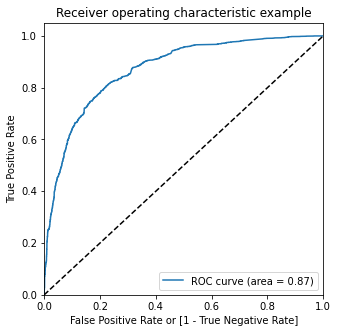

In [66]:
draw_roc( y_train, y_train_predict )

* Probability score 0.8 would be an optimal cutoff point as per the above ROC, but let's check what would be the optimal value of cutoff point that will help to increase business. 

In [67]:
train_score_card = pd.DataFrame()
train_score_card['y_actual'] = y_train.to_list()
train_score_card['y_prob'] = y_train_predict

In [68]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_score_card[i]= train_score_card.y_prob.map(lambda x: 1 if x > i else 0)
train_score_card.head()

,y_actual,y_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.804783,1,1,1,1,1,1,1,1,1,0
1,0,0.143224,1,1,0,0,0,0,0,0,0,0
2,1,0.690033,1,1,1,1,1,1,1,0,0,0
3,1,0.904895,1,1,1,1,1,1,1,1,1,1
4,0,0.091053,1,0,0,0,0,0,0,0,0,0


In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_score_card.y_actual, train_score_card[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385436  1.000000  0.000000
0.1   0.1  0.588590  0.973927  0.346918
0.2   0.2  0.719388  0.910550  0.599497
0.3   0.3  0.767780  0.836743  0.724528
0.4   0.4  0.794991  0.768953  0.811321
0.5   0.5  0.799474  0.687926  0.869434
0.6   0.6  0.793445  0.602487  0.913208
0.7   0.7  0.767471  0.492980  0.939623
0.8   0.8  0.736549  0.372242  0.965031
0.9   0.9  0.688466  0.208584  0.989434


* We would need a high sensitivity in order to grow our business.
* A high sensitivity means we are predicting more customers correctly who are going to be converted.

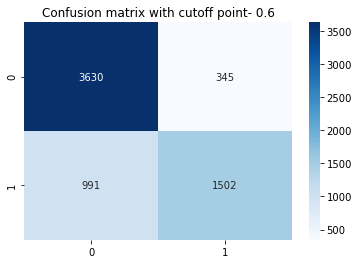

In [70]:
cutoff = 0.6
cm1 = metrics.confusion_matrix(train_score_card.y_actual, train_score_card[cutoff] )
plt.title(f"Confusion matrix with cutoff point- {cutoff}")
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues')
plt.show()

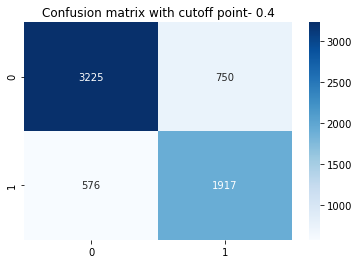

In [71]:
cutoff = 0.4
cm1 = metrics.confusion_matrix(train_score_card.y_actual, train_score_card[cutoff] )
plt.title(f"Confusion matrix with cutoff point- {cutoff}")
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues')
plt.show()

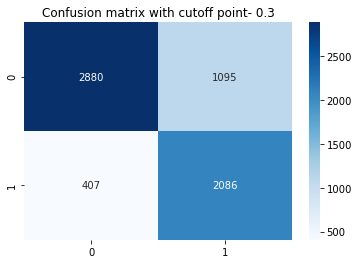

In [72]:
cutoff = 0.3
cm1 = metrics.confusion_matrix(train_score_card.y_actual, train_score_card[cutoff] )
plt.title(f"Confusion matrix with cutoff point- {cutoff}")
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues')
plt.show()

* **So, if we need more calls to make then we can reduce the cutoff threshold, and if we need less calls to make then we can increase the cutoff threshold.**

### Predict Test Data

In [73]:
# Noticed that test has one record where 'Lead Origin' is 'Quick Add Form' and this was not present in train data.
test_data['Lead Origin'].value_counts()

Landing Page Submission    1496
API                        1059
Lead Add Form               201
Lead Import                  15
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [74]:
# Let's plac Null to Lead Origin where it is 'Quick Add Form'
test_data['Lead Origin'] = np.where(test_data['Lead Origin'].isin(['Quick Add Form']), None, test_data['Lead Origin'])

In [75]:
# Similar case with 'Lead Source'
unseen_lead_source_label = set(test_data['Lead Source']) - set(train_data['Lead Source'])
unseen_lead_source_label

{'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home'}

In [76]:
test_data['Lead Source'].value_counts()

Google               867
Direct Traffic       783
Olark Chat           492
Organic Search       364
Reference            155
Referral Sites        40
Welingak Website      37
Facebook              15
bing                   4
welearnblog_Home       1
Pay per Click Ads      1
WeLearn                1
blog                   1
Live Chat              1
Name: Lead Source, dtype: int64

In [77]:
test_data['Lead Source'] = np.where(test_data['Lead Source'].isin(unseen_lead_source_label), None, test_data['Lead Source'])

In [78]:
unseen_country_label = set(test_data['Country']) - set(train_data['Country'])
unseen_country_label

{'China', 'Denmark', 'Liberia', 'Sri Lanka'}

In [79]:
test_data['Country'] = np.where(test_data['Country'].isin(unseen_country_label), None, test_data['Country'])

In [80]:
x_test, y_test = transform_test_data(test_data.copy(), label_encoder_dict, min_max_scaling, remove_addition_columns=['City', 'TotalVisits'])

In [81]:
x_test_sm = sm.add_constant(x_test)
y_test_predict = model.predict(x_test_sm)

In [82]:
y_test_pred = [1 if cell>0.8 else 0 for cell in y_test_predict ]
metrics.accuracy_score(y_test, y_test_pred)

0.7211399711399712

In [83]:
test_score_card = pd.DataFrame()
test_score_card['y_actual'] = y_test.to_list()
test_score_card['y_prob'] = y_test_predict

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    test_score_card[i]= test_score_card.y_prob.map(lambda x: 1 if x > i else 0)
test_score_card.head()

,y_actual,y_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.618627,1,1,1,1,1,1,1,0,0,0
1,1,0.610507,1,1,1,1,1,1,1,0,0,0
2,1,0.220435,1,1,1,0,0,0,0,0,0,0
3,0,0.066332,1,0,0,0,0,0,0,0,0,0
4,0,0.058434,1,0,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_test_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(test_score_card.y_actual, test_score_card[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_test_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_test_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385281  1.000000  0.000000
0.1   0.1  0.587302  0.962547  0.352113
0.2   0.2  0.704545  0.901685  0.580986
0.3   0.3  0.745671  0.833333  0.690728
0.4   0.4  0.772367  0.763109  0.778169
0.5   0.5  0.777778  0.676966  0.840962
0.6   0.6  0.773088  0.590824  0.887324
0.7   0.7  0.758297  0.488764  0.927230
0.8   0.8  0.721140  0.344569  0.957160
0.9   0.9  0.680014  0.191948  0.985915


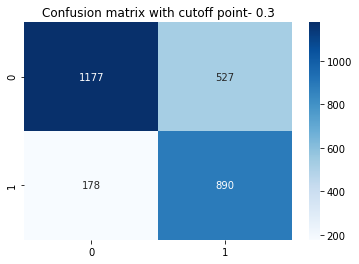

In [86]:
cutoff = 0.3
cm1 = metrics.confusion_matrix(test_score_card.y_actual, test_score_card[cutoff] )
plt.title(f"Confusion matrix with cutoff point- {cutoff}")
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues')
plt.show()

### Conclusion- Ideally, we can go with 0.3 as a cutoff point, and later we can modify it as our need.